In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def ber_awgn(num_s_o,mod_s,snr):
    # num_s_0 - Number of symbols
    # mod_s - Modulation order
    # rel_pow - (G_a*G_tx)
    num_s = num_s_o;
    mod_order = mod_s; # 1,2 or 4

    n_bits = num_s*mod_order;

    bit_tx = np.random.randint(2, size=(n_bits,)) 

    I_tx = np.zeros((int(num_s),),'complex');
    Q_tx = np.zeros((int(num_s),),'complex');

    # Modulation
    if(mod_order == 4):
        # 16 QAM
        I_tx = 2*(bit_tx[::4] + 2*bit_tx[1::4] - 1.5)/np.sqrt(10);
        Q_tx = 2*(2*bit_tx[2::4] + bit_tx[3::4] - 1.5)/np.sqrt(10);
    elif(mod_order == 2):
        # QPSK
        I_tx = (2*bit_tx[::2] - 1)/np.sqrt(2);
        Q_tx = (2*bit_tx[1::2] - 1)/np.sqrt(2);
    elif(mod_order == 1):
        # BPSK
        I_tx = 2*bit_tx -1;

    sig_tx = I_tx + 1j*Q_tx;
    print(sig_tx)
    
    n_v = (np.random.normal(0,1,size=num_s)+1j*np.random.normal(0,1,size=num_s))/np.sqrt(2);
    
    sig_rx_n = sig_tx + n_v/np.sqrt(snr);
    
    I_rx = np.real(sig_rx_n);
    Q_rx = np.imag(sig_rx_n);

    num_err = 0;
    # Demodulation & error detection
    if(mod_order == 4):
        # 16 QAM
        # Left as exercise for reader
        return -1;
    elif(mod_order == 2):
        # QPSK    
        for i in range(0,num_s):
            flag2 = (Q_rx[i]*Q_tx[i]) < 0;
            flag1 = (I_rx[i]*I_tx[i]) < 0;
            if(flag1|flag2):
                num_err = num_err+1;
    elif(mod_order == 1):
        # BPSK
        for i in range(0,num_s):
            flag1 = (I_rx[i]*I_tx[i]) < 0;
            if(flag1):
                num_err = num_err+1;
                
    return float(num_err/num_s)

# BPSK
# SNR = 2
err_1 = ber_awgn(100,1,2);
print(err_1);
# BPSK
# SNR = 3
err_2 = ber_awgn(100,1,3);
print(err_2);
# QPSK
# SNR = 3
err_3 = ber_awgn(100,2,3);
print(err_3);

[0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0
 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1]
[-1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
 -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j
 -1.+0.j  1.+0.j  1.+0.j -1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j -1.+0.j
 -1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j -1.+0.j
 -1.+0.j  1.+0.j  1.+0.j -1.+0.j -1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j
 -1.+0.j -1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j
  1.+0.j -1.+0.j -1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
  1.+0.j -1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j -1.+0.j -1.+0.j
 -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j  1.+0.j -1.+0.j -1.+0.j
 -1.+0.j  1.+0.j -1.+0.j -1.+0.j -1.+0.j  1.+0.j  1.+0.j -1.+0.j  1.+0.j
 -1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j -1.+0.j  1.+0.j -

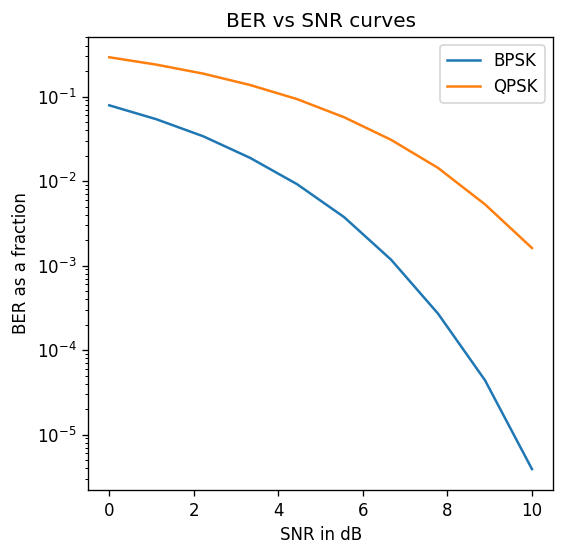

In [ ]:
# BER Curve for BPSK

snr_v = np.logspace(0,1,10);

ber_vec_bpsk = np.zeros((10,),'float');
ber = 0;
j = 0;
for snr in snr_v:
    ber = 0;   
    for i in range(0,250):
        ber = ber+ber_awgn(8192,1,snr);
    ber_vec_bpsk[j] = ber/250;
    j = j+1;
# BER Curve for QPSK

ber_vec_qpsk = np.zeros((10,),'float');
ber = 0;
j = 0;
for snr in snr_v:
    ber = 0;   
    for i in range(0,250):
        ber = ber+ber_awgn(8192,2,snr);
    ber_vec_qpsk[j] = ber/250;
    j = j+1;
# Plotting the BER curves

fig = plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k');
plt.plot(10*np.log10(snr_v),ber_vec_bpsk);
plt.plot(10*np.log10(snr_v),ber_vec_qpsk);
plt.semilogy();
plt.title('BER vs SNR curves');
plt.xlabel('SNR in dB');
plt.ylabel('BER as a fraction');
plt.legend(['BPSK','QPSK']);

In [ ]:
!pip install komm
!pip install scikit-commpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from scipy.fftpack import fft, ifft
from komm import PSKModulation
import commpy.channelcoding.convcode as cc
from komm import QAModulation
from komm import AWGNChannel

def generateRandBits(length):
  bits = np.random.binomial(n=1, p=0.5, size=length)
  return bits

def encodeBits(bits,trellis):
  return cc.conv_encode(bits, trellis)

def modulatationSelect(type):
  if(type=='16QAM'):
    mod = QAModulation(16)
  elif(type=='64QAM'):
    mod = QAModulation(64)
  elif(type=='BPSK'):
    mod = PSKModulation(2)
  elif(type=='QPSK'):
    mod = PSKModulation(4)
  else:
    print("Not a modulation type.")
  return mod

def modulation(encodedBits,mod):
  return mod.modulate(encodedBits)

# inverse fast fourier transformation 
def IFFT(moddedBits):
  return ifft(moddedBits)
'''
addGI: add a cyclic prefix of 1/4 as a guard interval. This type of GI provides two main functions:
1) The cyclic prefix provides a guard interval to eliminate intersymbol interference from the previous symbol.
   -InterSymbol Interference (ISI) is a kind of distortion that occurs when one or more symbols (pulses in digital baseband transmission) 
    interfere with subsequent signals. This can cause noise in the signal which can cause the output to be less than ideal.
   -ISI occurs when there is multipath propagation and/or nonlinear frequency in the channels.  These causes can be reduced 
    which can help eliminate ISI from the system to achieve an ideal output.
2) It repeats the end of the symbol so the linear convolution of a frequency-selective multipath channel can 
be modeled as circular convolution, which in turn may transform to the frequency domain via a discrete Fourier transform. 
This approach accommodates simple frequency domain processing, such as channel estimation and equalization. 
'''
def addGI(ifftData,lengthOfBits):
    cp = ifftData[-lengthOfBits//4:]
    return np.hstack([cp, ifftData]) 

def addAWGN(ifftBits,snr,modType):
  #does signal power need to change for every mod scheme?
  modTypeToM={'BPSK':2,'QPSK':4,'16QAM':16,'64QAM':64}
  k=np.log2(modTypeToM[modType])
  convertedSNR = 10*np.log10(k)+snr
  SP=np.mean(abs(ifftBits**2))
  awgn=AWGNChannel(snr=convertedSNR, signal_power=SP)
  return awgn(ifftBits)

def removeGI(signal,lengthOfBits):
    return signal[lengthOfBits//4:(lengthOfBits//4+lengthOfBits)]

def FFT(awgnBits):
  return fft(awgnBits)

def demodulation(fftBits,mod):
  return mod.demodulate(fftBits)

def decodeBits(demoddedBits,trellis):
  return cc.viterbi_decode(demoddedBits.astype(float), trellis)

def run(bitLen,modType,snr,trellis):
  totalBitErrors=0
  bits=generateRandBits(bitLen)
  #print(bits)
  en=encodeBits(bits,trellis)
  # print(len(en))
  # adds padded 0s to encoded bits to ensure that each subcarrier has
  # the same amount of bits with respect to its' scheme.
  if(modType=="QPSK"):
    while(len(en)%2 != 0):
      en=np.append(en,0)
  if(modType=="16QAM"):
    while(len(en)%4 != 0):
      en=np.append(en,0)
  if(modType=="64QAM"):
    while(len(en)%6 != 0):
      en=np.append(en,0)
  mod=modulatationSelect(modType)
  modded=modulation(en,mod)
  # print(modded)
  ifft=IFFT(modded)
  addGI(ifft,len(bits))
  # print(ifft)
  awgn=addAWGN(ifft,snr,modType)
  removeGI(awgn,len(bits))
  # print(awgn)
  fft=FFT(awgn)
  # print(fft)
  demod=demodulation(fft,mod)
  # print(demod)
  decode=decodeBits(demod,trellis)
  #print(decode)
  #decode=decode[:len(decode)-1]
  # print(len(decode))
  for i in range(len(bits)):
    if bits[i]!=decode[i]:
      totalBitErrors+=1
  return totalBitErrors


def simulator(numOfSims,bitLen,modType,snrs,trellis):
  modTypeToM={'BPSK':2,'QPSK':4,'16QAM':16,'64QAM':64}
  BERs=[]
  theory=[]
  for snr in snrs:
    allBitErrors=0
    for i in range(numOfSims):
      errors=run(bitLen,modType,snr,trellis)
      allBitErrors+=errors
    BERs=np.append(BERs,allBitErrors/(bitLen*numOfSims))
    theory = np.append(theory,(ser_awgn(snr,modType,modTypeToM[modType]))) #theory SER
  return BERs,theory
  

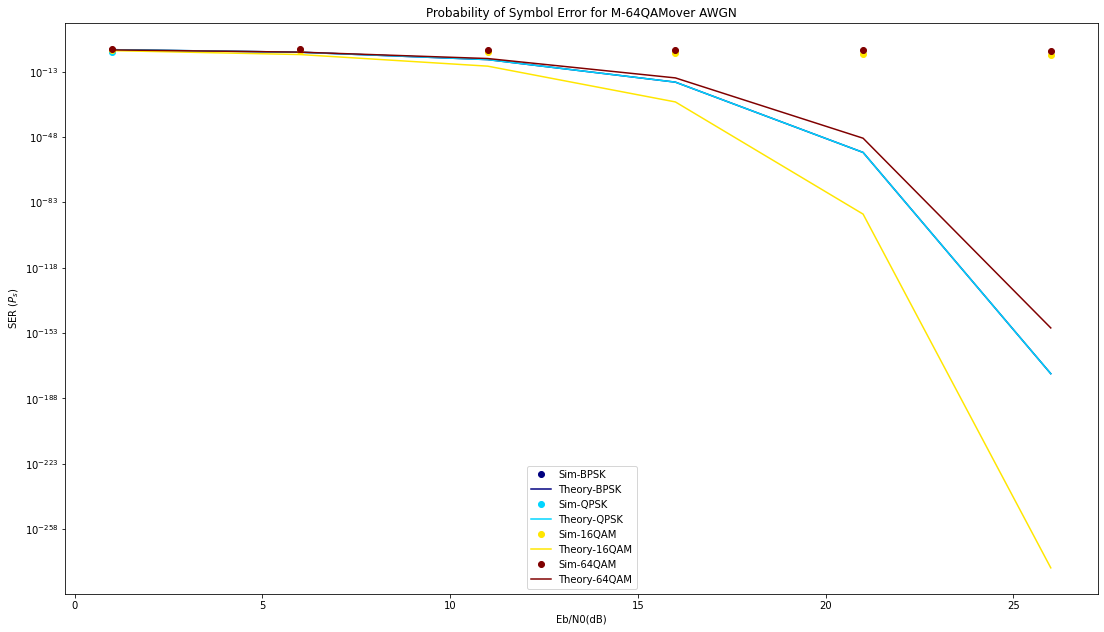

In [ ]:
import numpy as np# for numerical computing
import matplotlib.pyplot as plt# for plotting functions
from matplotlib import cm # colormap for color palette
from scipy.special import erfc
# Number of delay elements in the convolutional encoder
memory = np.array(1, ndmin=1)
# Generator matrix
g_matrix = np.array((0o5, 0o7), ndmin=2)
# Create trellis data structure
trellis = cc.Trellis(memory, g_matrix)
modTypes=['BPSK','QPSK','16QAM','64QAM']
colors = plt.cm.jet(np.linspace(0,1,len(modTypes))) # colormap
fig, ax = plt.subplots(nrows=1,ncols = 1)
snrs=np.arange(start=1,stop = 30, step = 5)
for i,modType in enumerate(modTypes):
  BERs,theory=simulator(100,100,modType,snrs,trellis)
  ax.semilogy(snrs,BERs,color =colors[i],marker='o',linestyle='',label='Sim'+'-'+modType)
  ax.semilogy(snrs,theory,color = colors[i],linestyle='-',label='Theory'+'-'+modType)
ax.set_xlabel('Eb/N0(dB)');ax.set_ylabel('SER ($P_s$)')
ax.set_title('Probability of Symbol Error for M-'+str(modType)+'over AWGN')
ax.legend();fig.show()
fig.set_size_inches(18.5, 10.5)
  


In [ ]:
import numpy as np
from numpy import log2,sqrt,sin,pi,exp
from scipy.special import erfc
from scipy.integrate import quad

def ser_awgn(EbN0dBs,mod_type=None,M=0,coherence=None):
  """
    Theoretical Symbol Error Rates for various modulations over AWGN
      Parameters:
        EbN0dBs : list of SNR per bit values in dB scale
        mod_type :'PSK','QAM','PAM','FSK'M : Modulation level for the chosen modulation.
        For PSK,PAM,FSK M can be any power of 2.
        For QAM M must be even power of 2 (square QAM only)
        coherence :'coherent'for coherent FSK detection'noncoherent'for noncoherent FSK detection
        This parameter is only applicable for FSK modulation
      Returns:SERs = Symbol Error Rates
  """
  if mod_type==None:
    raise ValueError('Invalid value for mod_type')
  if(M<2)or((M & (M -1))!=0): #if M not a power of 2
    raise ValueError('M should be a power of 2')
  func_dict = {'BPSK': psk_awgn,'QPSK': psk_awgn,'16QAM':qam_awgn,'64QAM':qam_awgn}
  gamma_s = log2(M)*(10**(EbN0dBs/10))
  return func_dict[mod_type](M,gamma_s) #call appropriate function

def psk_awgn(M,gamma_s):
  gamma_b = gamma_s/log2(M)
  if (M==2):
    SERs = 0.5*erfc(sqrt(gamma_b))
  elif M==4:
    k = log2(M)
    return 1 / k * erfc(sqrt(gamma_b * k) * sin(np.pi / M))
  else:
    SERs = erfc(sqrt(gamma_s)*sin(pi/M))
  return SERs

def qam_awgn(M,gamma_s):
  if (M==1)or(np.mod(np.log2(M),2)!=0): # M not a even power of 2
    raise ValueError('Only square MQAM supported. M must be even power of 2')
  k = np.log2(M)
  SERs= 2/k*(1-1/sqrt(M))*erfc(sqrt(3 *gamma_s*k/(2*(M - 1))))
  return SERs


In [ ]:
ser_awgn(1,'64QAM',64)

0.7296958784818188

ValueError: ignored

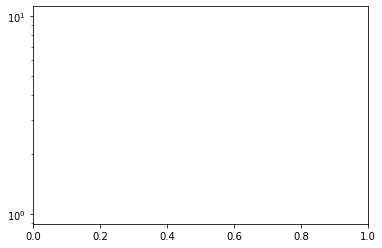

In [ ]:
import numpy as np# for numerical computing
import matplotlib.pyplot as plt# for plotting functions
from matplotlib import cm # colormap for color palette
from scipy.special import erfc
# from DigiCommPy.modem import PSKModem,QAMModem,PAMModem,FSKModem
# from DigiCommPy.channels import awgn 
# from DigiCommPy.errorRates import ser_awgn
#---------Input Fields------------------------
nSym = 1000 # Number of symbols to transmit
EbN0dBs = [5,8,10,15,25]
mod_type ='qam'# Set'PSK'or'QAM'or'PAM'or'FSK'
arrayOfM = [2,4,8,16,32] # array of M values to simulate
#arrayOfM=[4,16,64,256] # uncomment this line if MOD_TYPE='QAM'

modem_dict = {'psk': psk_awgn,'qam':qam_awgn}
colors = plt.cm.jet(np.linspace(0,1,len(arrayOfM))) # colormap
fig, ax = plt.subplots(nrows=1,ncols = 1)
for i, M in enumerate(arrayOfM):
  #-----Initialization of various parameters----
  k=np.log2(M)
  EsN0dBs = 10*np.log10(k)+EbN0dBs # EsN0dB calculation
  SER_sim = np.zeros(len(EbN0dBs)) # simulated Symbol error rates
  inputSyms = np.random.randint(low=0, high = M, size=nSym)# uniform random symbols from 0 to M-1
  modem = modem_dict[mod_type.lower()](M)#choose modem from dictionary
  modulatedSyms = modem.modulate(inputSyms) #modulate
  for j,EsN0dB in enumerate(EsN0dBs):
    receivedSyms = awgn(modulatedSyms,EsN0dB) #add awgn noise
    detectedSyms = modem.demodulate(receivedSyms)
    SER_sim[j] = np.sum(detectedSyms != inputSyms)/nSym
  SER_theory = ser_awgn(EbN0dBs,mod_type,M) #theory SER
  ax.semilogy(EbN0dBs,SER_sim,color =colors[i],marker='o',linestyle='',label='Sim'+str(M)+'-'+mod_type.upper())
  ax.semilogy(EbN0dBs,SER_theory,color = colors[i],linestyle='-',label='Theory'+str(M)+'-'+mod_type.upper())
ax.set_xlabel('Eb/N0(dB)');ax.set_ylabel('SER ($P_s$)')
ax.set_title('Probability of Symbol Error for M-'+str(mod_type)+'over AWGN')
ax.legend();fig.show()

In [ ]:
from IPython.utils.py3compat import decode
import commpy.channelcoding.convcode as cc
bits=generateRandBits(6)
print(bits)

# Number of delay elements in the convolutional encoder
memory = np.array(1, ndmin=1)
punctureMatrix=np.array([[1,0,1],[1,1,0]])
# Generator matrix
g_matrix = np.array((0o5, 0o7), ndmin=2)

# Create trellis data structure
trellis1 = cc.Trellis(memory, g_matrix)
print(trellis1.k)
print(trellis1.n)

coded_bits = cc.conv_encode(bits, trellis1)#,puncture_matrix=punctureMatrix)
print("code",coded_bits)

decoded_bits = cc.viterbi_decode(coded_bits.astype(float), trellis1)
decoded_bits=decoded_bits[:len(decoded_bits)-1]

print("deco", decoded_bits)
np.bitwise_xor(bits,decoded_bits)

[0 1 1 0 0 1]
1
2
code [0 0 1 1 1 0 0 1 0 0 1 1 0 1]
deco [0 1 1 0 0 1]


array([0, 0, 0, 0, 0, 0])

In [ ]:
EbN0dBs = np.arange(start=-4,stop = 12, step = 2)
k=np.log2(16)
print(k)
EsN0dBs = 10*np.log10(k)+EbN0dBs # EsN0dB calculation
EsN0dBs

4.0


array([ 2.02059991,  4.02059991,  6.02059991,  8.02059991, 10.02059991,
       12.02059991, 14.02059991, 16.02059991])